# 12-2. Boston 주택 가격 예측 모델
- 보스턴 시의 주택 가격 데이터셋
- 주택의 여러 요건과 가격 정보가 포함
- 회귀 문제

## 데이터 로드 및 전처리

In [1]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

404
102


In [3]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
mean = train_data.mean(axis=0)
train_data = train_data - mean

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
std = train_data.std(axis=0)
train_data = train_data / std

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
test_data = test_data - mean
test_data = test_data / std

## 모델 구성 및 컴파일

In [4]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.

# 모델 정의
model = models.Sequential()
model.add(layers.Input(shape=(train_data.shape[1], )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, ))  # 회귀이므로 자유로운 출력을 위해 활성화 함수 x _ 포함했을 때 loss가 매우 큼

# 모델 컴파일
model.compile(loss='mse',
             optimizer='Adam',
             metrics=['mae'])

In [5]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.

# early_stopping 콜백
from tensorflow.keras import callbacks
early_stopping_cb = callbacks.EarlyStopping(patience=10,
                                           monitor='val_loss',
                                           restore_best_weights=True)

# 모델 학습
history = model.fit(train_data, train_labels, epochs=60,
                    validation_data=(test_data, test_labels),
                    callbacks=[early_stopping_cb])

Epoch 1/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 569.8164 - mae: 22.1634 - val_loss: 551.1833 - val_mae: 21.7708
Epoch 2/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 506.1415 - mae: 20.5478 - val_loss: 487.1806 - val_mae: 20.3054
Epoch 3/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 426.2432 - mae: 18.8318 - val_loss: 399.8045 - val_mae: 18.1440
Epoch 4/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 358.2718 - mae: 17.0607 - val_loss: 287.6198 - val_mae: 15.0559
Epoch 5/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 241.6395 - mae: 13.5732 - val_loss: 173.5565 - val_mae: 11.4148
Epoch 6/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 140.6377 - mae: 9.8052 - val_loss: 101.5992 - val_mae: 8.5361
Epoch 7/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 100.5849 - mae: 7.5719 - val_loss: 74.9900 - val_mae: 6.9015
Epoch 8/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 71.2186 - mae: 6.5733 - val_loss: 58.9456 - val_mae: 6.0911
Epoch 9/60
13/13 ━━━━━━━━━━━━━━━━

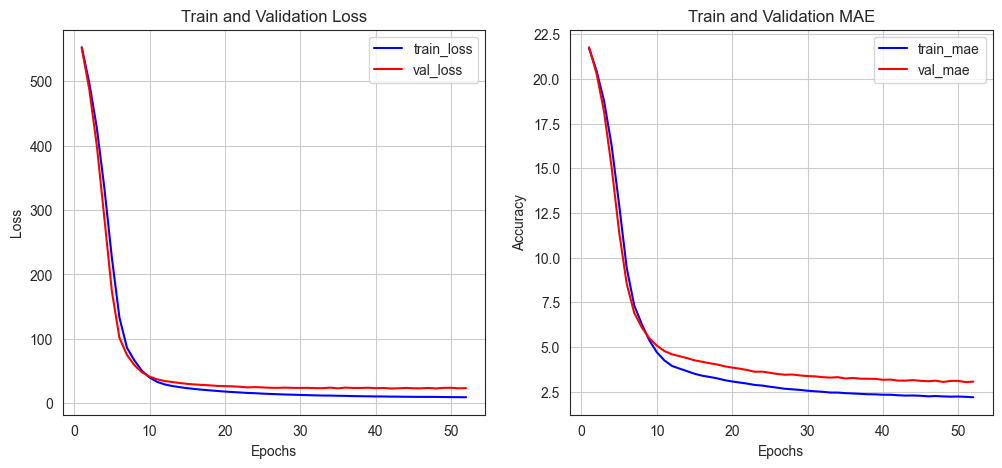

In [6]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
import seaborn as sns
# plt.style.use('seaborn-white')
sns.set_style('white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [7]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(test_data, test_labels)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17.2558 - mae: 2.9120


[22.949535369873047, 3.113316535949707]

## 모델 최적화

In [8]:
# 두 개의 모델 학습 히스토리를 차트로 비교할 수 있도록 시각화 함수 diff_history()
def diff_history(history1, history2):
    history1_dict = history1.history
    h1_loss = history1_dict['loss']
    h1_val_loss = history1_dict['val_loss']

    history2_dict = history2.history
    h2_loss = history2_dict['loss']
    h2_val_loss = history2_dict['val_loss']

    epochs1 = range(1, len(h1_loss) + 1)
    epochs2 = range(1, len(h2_loss) + 1)

    fig = plt.figure(figsize=(12, 5))
    plt.subplots_adjust(wspace=0.3, hspace=0.3)

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs1, h1_loss, 'b-', label='train_loss')
    ax1.plot(epochs1, h1_val_loss, 'r-', label='val_loss')
    ax1.plot(epochs2, h2_loss, 'b--', label='train_loss')
    ax1.plot(epochs2, h2_val_loss, 'r--', label='val_loss')
    ax1.set_title('Train and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    h1_accuracy = history1_dict['mae']
    h1_val_accuracy = history1_dict['val_mae']

    h2_accuracy = history2_dict['mae']
    h2_val_accuracy = history2_dict['val_mae']

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs1, h1_accuracy, 'b-', label='train_mae')
    ax2.plot(epochs1, h1_val_accuracy, 'r-', label='val_mae')
    ax2.plot(epochs2, h2_accuracy, 'b--', label='train_mae')
    ax2.plot(epochs2, h2_val_accuracy, 'r--', label='val_mae')
    ax2.set_title('Train and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()

In [9]:
## l2 규제
# 모델 정의
model = models.Sequential()
model.add(layers.Input(shape=(train_data.shape[1], )))
model.add(layers.Dense(64, kernel_regularizer='l2', activation='relu'))
model.add(layers.Dense(64, kernel_regularizer='l2', activation='relu'))
model.add(layers.Dense(1, ))  # 회귀이므로 자유로운 출력을 위해 활성화 함수 x _ 포함했을 때 loss가 매우 큼

# 모델 컴파일
model.compile(loss='mse',
             optimizer='Adam',
             metrics=['mae'])

# 모델 학습
history2 = model.fit(train_data, train_labels, epochs=60,
                    validation_data=(test_data, test_labels),
                    callbacks=[early_stopping_cb])

Epoch 1/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 560.9079 - mae: 21.9036 - val_loss: 570.5470 - val_mae: 22.0567
Epoch 2/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 530.9822 - mae: 21.1189 - val_loss: 511.5930 - val_mae: 20.6624
Epoch 3/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 483.1479 - mae: 19.8229 - val_loss: 432.1237 - val_mae: 18.6658
Epoch 4/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 396.8060 - mae: 17.4962 - val_loss: 326.1814 - val_mae: 15.9386
Epoch 5/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 264.2446 - mae: 14.2527 - val_loss: 209.0598 - val_mae: 12.5407
Epoch 6/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 175.7875 - mae: 10.9786 - val_loss: 114.4492 - val_mae: 9.1012
Epoch 7/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 111.0042 - mae: 8.2645 - val_loss: 69.9422 - val_mae: 6.7708
Epoch 8/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 69.2551 - mae: 6.3105 - val_loss: 54.2359 - val_mae: 5.8908
Epoch 9/60
13/13 ━━━━━━━━━━━━━━━

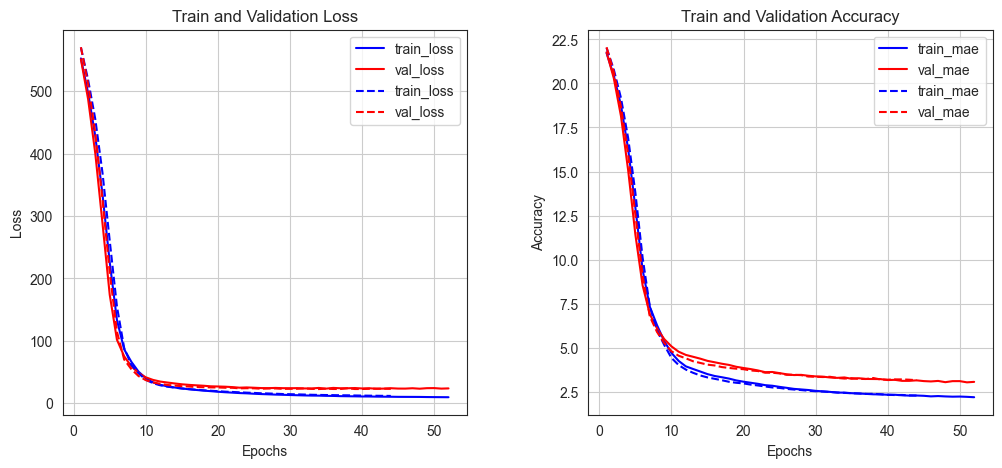

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18.4845 - mae: 3.0634
[22.45009422302246, 3.2435104846954346]


In [10]:
# 시각화
diff_history(history, history2)

# 모델 평가
print(model.evaluate(test_data, test_labels))

In [11]:
## 드롭아웃
# 모델 정의
model = models.Sequential()
model.add(layers.Input(shape=(train_data.shape[1], )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1, ))

# 모델 컴파일
model.compile(loss='mse',
             optimizer='Adam',
             metrics=['mae'])

# 모델 학습
history3 = model.fit(train_data, train_labels, epochs=60,
                    validation_data=(test_data, test_labels),
                    callbacks=[early_stopping_cb])

Epoch 1/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 630.9425 - mae: 23.2663 - val_loss: 581.8997 - val_mae: 22.3139
Epoch 2/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 537.7469 - mae: 21.2619 - val_loss: 533.9633 - val_mae: 21.2018
Epoch 3/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 484.0050 - mae: 20.0099 - val_loss: 471.5625 - val_mae: 19.6839
Epoch 4/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 426.5131 - mae: 18.4763 - val_loss: 387.7361 - val_mae: 17.5336
Epoch 5/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 331.9731 - mae: 15.9889 - val_loss: 286.5252 - val_mae: 14.8799
Epoch 6/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 247.6138 - mae: 13.4523 - val_loss: 181.3271 - val_mae: 11.6435
Epoch 7/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 169.5646 - mae: 10.7062 - val_loss: 104.9982 - val_mae: 8.7482
Epoch 8/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 94.9607 - mae: 7.6891 - val_loss: 68.4638 - val_mae: 6.7038
Epoch 9/60
13/13 ━━━━━━━━━━━━

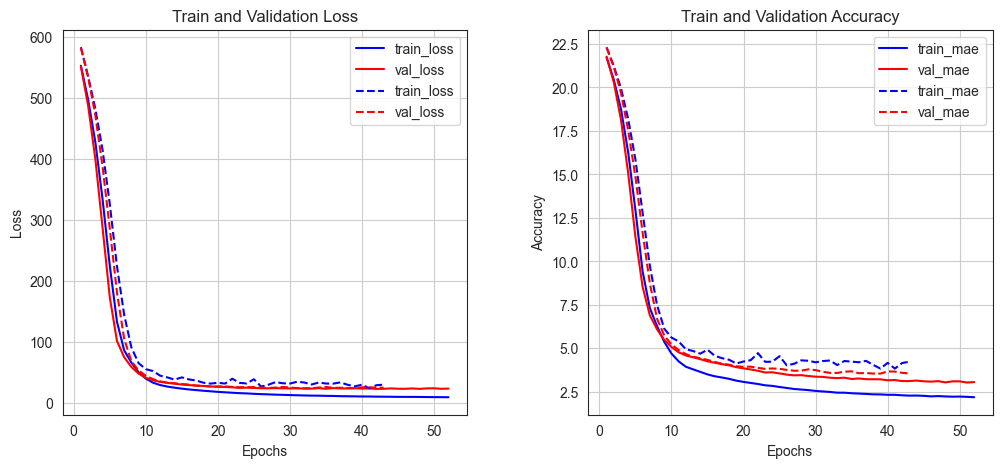

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 20.6682 - mae: 3.4244
[23.96541976928711, 3.5798118114471436]


In [12]:
# 시각화
diff_history(history, history3)

# 모델 평가
print(model.evaluate(test_data, test_labels))

In [13]:
## 배치 정규화
# 모델 정의
model = models.Sequential()
model.add(layers.Input(shape=(train_data.shape[1], )))
model.add(layers.Dense(64))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
# model.add(layers.Dropout(0.3))
model.add(layers.Dense(64))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
# model.add(layers.Dropout(0.3))
model.add(layers.Dense(1, ))

# 모델 컴파일
model.compile(loss='mse',
             optimizer='Adam',
             metrics=['mae'])

# 모델 학습
history4 = model.fit(train_data, train_labels, epochs=60,
                    validation_data=(test_data, test_labels),
                    callbacks=[early_stopping_cb])

Epoch 1/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 560.2287 - mae: 22.1724 - val_loss: 591.4154 - val_mae: 22.7940
Epoch 2/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 573.2595 - mae: 22.6308 - val_loss: 569.5076 - val_mae: 22.4378
Epoch 3/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 509.3967 - mae: 21.4836 - val_loss: 547.4518 - val_mae: 22.0517
Epoch 4/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 500.5502 - mae: 21.3543 - val_loss: 527.0711 - val_mae: 21.6874
Epoch 5/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 440.2697 - mae: 20.1831 - val_loss: 506.5132 - val_mae: 21.3054
Epoch 6/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 419.7809 - mae: 19.6702 - val_loss: 482.3375 - val_mae: 20.8348
Epoch 7/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 404.4341 - mae: 19.2201 - val_loss: 454.1352 - val_mae: 20.2700
Epoch 8/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 418.0208 - mae: 19.5176 - val_loss: 431.3935 - val_mae: 19.7937
Epoch 9/60
13/13 ━━━━━━

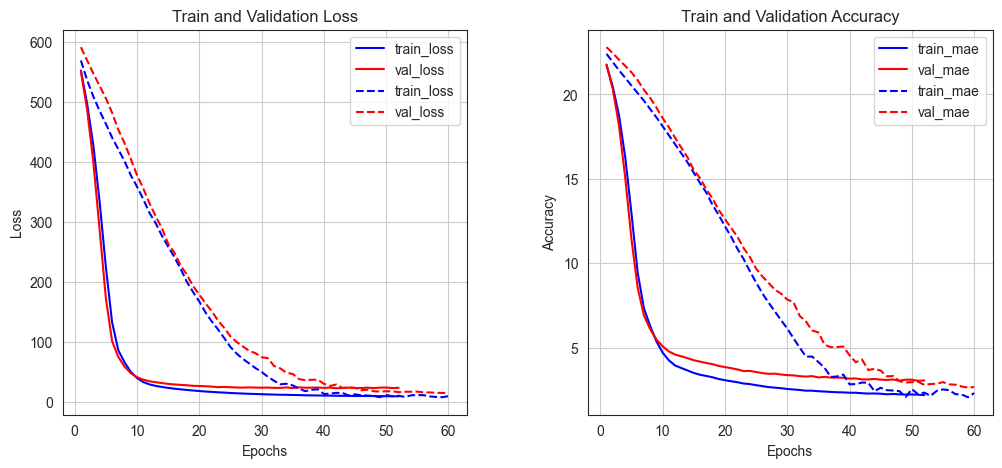

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.6682 - mae: 2.4423
[14.991545677185059, 2.6305673122406006]


In [14]:
# 시각화
diff_history(history, history4)

# 모델 평가
print(model.evaluate(test_data, test_labels))

| history | 모델 최적화 | loss | mae | 비고 | 
|---------|----------|-------|---------|-----|
| history | 기본 | 22.9117 | 3.0211 | - |
| history2 | regularization_l2 | 24.2415 | 3.3639 | - | 
| history3 | regularization_dropout | 22.1149 | 3.3108 | - | 
| history4 | batch normalization | 13.1937 | 2.6055 | 

# 12-3. Reuters 딥러닝 모델
- 로이터 뉴스 기사 데이터셋
- 8,982개의 훈련 데이터셋과 2,246개의 테스트 데이터셋
- 뉴스 기사의 주제로 46개의 레이블

## 데이터 로드 및 전처리
- 텍스트 데이터를 벡터로 변환(원-핫 인코딩)
- 뉴스 주제인 레이블도 원-핫 인코딩(범주형 인코딩)을 이용해 변환 수행

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [16]:
# 문제 2-1: reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.

(x_train_full, y_train_full), (test_data, test_labels) = reuters.load_data(num_words=10000)

train_data, val_data, train_labels, val_labels = train_test_split(x_train_full, y_train_full,
                                                 test_size=0.25,  
                                                 random_state=123)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력합니다.
print(len(train_data))
print(len(val_data))
print(len(test_data))
print(len(set(train_labels)))

6736
2246
2246
46


In [17]:
# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.
def one_hot_encoding(data, dim=10000):
    results = np.zeros((len(data), dim))
    for i, d in enumerate(data):
        results[i, d] = 1.
    return results

x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.
y_train = utils.to_categorical(train_labels)
y_val = utils.to_categorical(val_labels)
y_test = utils.to_categorical(test_labels)

## 모델 구성 및 컴파일
- BatchNormalization과 Dropout을 적용하여 빠르게 학습하면서 과대적합을 방지
- 46개의 뉴스 주제를 분류하는 딥러닝 모델을 구성

In [18]:
# 문제 2-3: 빠른 학습과 과대적합을 방지하기 위해 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성합니다.

# 모델 정의
model = models.Sequential()
model.add(layers.Dense(128, input_shape=(10000, ), name='input'))
model.add(layers.BatchNormalization()) 
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(128, name='hidden'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(46, activation='softmax', name='output'))

# 모델 컴파일
model.compile(loss='categorical_crossentropy',
             optimizer='Adam',
             metrics=['accuracy'])

/Users/chaeseunghee/miniconda3/envs/tf_aiffel/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (Dense)                   │ (None, 128)            │     1,280,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden (Dense)                  │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 46)             │         5,934 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,303,598 (4.97 MB)

 Trainable params: 1,303,086 (4.97 MB)

 Non-trainable params: 512 (2.00 KB)

## 모델 학습

In [20]:
# 문제 2-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
# 콜백 함수 정의
check_point_cb = callbacks.ModelCheckpoint('reuters_model.h5',
                                          save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10,
                                           monitor='val_loss',
                                           restore_best_weights=True)

# 학습
history = model.fit(x_train, y_train, epochs=60,
                   validation_data=(x_val, y_val),
                   callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
199/211 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5177 - loss: 2.1233

211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5248 - loss: 2.0919 - val_accuracy: 0.7440 - val_loss: 1.3942
Epoch 2/60
199/211 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7946 - loss: 0.8820

211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7952 - loss: 0.8794 - val_accuracy: 0.7943 - val_loss: 0.9628
Epoch 3/60
210/211 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8730 - loss: 0.5406

211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8730 - loss: 0.5407 - val_accuracy: 0.7907 - val_loss: 0.9487
Epoch 4/60
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9080 - loss: 0.3937 - val_accuracy: 0.7988 - val_loss: 0.9530
Epoch 5/60
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9304 - loss: 0.2876 - val_accuracy: 0.8001 - val_loss: 0.9760
Epoch 6/60
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9456 - loss: 0.2286 - val_accuracy: 0.7903 - val_loss: 1.0219
Epoch 7/60
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9434 - loss: 0.2102 - val_accuracy: 0.7956 - val_loss: 1.0432
Epoch 8/60
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9526 - loss: 0.1792 - val_accuracy: 0.7979 - val_loss: 1.0143
Epoch 9/60
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9601 - loss: 0.1661 - val_accuracy: 0.7974 - val_loss: 1.0587
Epoch 10/60
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9592 - loss: 0.1608 - val_accuracy: 0.7992 - val

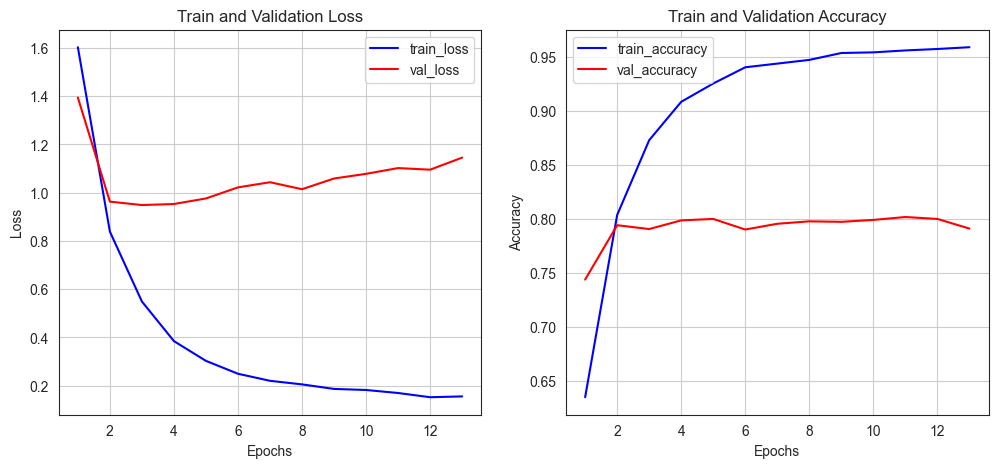

In [21]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
sns.set_style('white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [22]:
# 문제 2-5: 테스트 데이터셋을 이용해 모델을 평가합니다.
print(model.evaluate(x_test, y_test))

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step - accuracy: 0.8073 - loss: 0.8953
[0.9182685613632202, 0.7978628873825073]


## 모델 최적화

In [23]:
# 두 개의 모델 학습 히스토리를 차트로 비교할 수 있도록 시각화 함수 diff_history() - accuracy
def diff_history(history1, history2):
    history1_dict = history1.history
    h1_loss = history1_dict['loss']
    h1_val_loss = history1_dict['val_loss']

    history2_dict = history2.history
    h2_loss = history2_dict['loss']
    h2_val_loss = history2_dict['val_loss']

    epochs1 = range(1, len(h1_loss) + 1)
    epochs2 = range(1, len(h2_loss) + 1)

    fig = plt.figure(figsize=(12, 5))
    plt.subplots_adjust(wspace=0.3, hspace=0.3)

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs1, h1_loss, 'b-', label='train_loss')
    ax1.plot(epochs1, h1_val_loss, 'r-', label='val_loss')
    ax1.plot(epochs2, h2_loss, 'b--', label='train_loss')
    ax1.plot(epochs2, h2_val_loss, 'r--', label='val_loss')
    ax1.set_title('Train and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    h1_accuracy = history1_dict['accuracy']
    h1_val_accuracy = history1_dict['val_accuracy']

    h2_accuracy = history2_dict['accuracy']
    h2_val_accuracy = history2_dict['val_accuracy']

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs1, h1_accuracy, 'b-', label='train_accuracy')
    ax2.plot(epochs1, h1_val_accuracy, 'r-', label='val_accuracy')
    ax2.plot(epochs2, h2_accuracy, 'b--', label='train_accuracy')
    ax2.plot(epochs2, h2_val_accuracy, 'r--', label='val_accuracy')
    ax2.set_title('Train and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()

In [24]:
## 드롭아웃 0.5
# 모델 정의
model = models.Sequential()
model.add(layers.Dense(128, input_shape=(10000, ), name='input'))
model.add(layers.BatchNormalization()) 
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, name='hidden'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(46, activation='softmax', name='output'))

# 모델 컴파일
model.compile(loss='categorical_crossentropy',
             optimizer='Adam',
             metrics=['accuracy'])

# 모델 학습
history2 = model.fit(x_train, y_train, epochs=60,
                   validation_data=(x_val, y_val),
                   callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4195 - loss: 2.6164 - val_accuracy: 0.7115 - val_loss: 1.5361
Epoch 2/60
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7030 - loss: 1.2555 - val_accuracy: 0.7627 - val_loss: 1.1353
Epoch 3/60
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7630 - loss: 0.9866 - val_accuracy: 0.7823 - val_loss: 1.0531
Epoch 4/60
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8010 - loss: 0.8247 - val_accuracy: 0.7809 - val_loss: 1.0237
Epoch 5/60
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8380 - loss: 0.6564 - val_accuracy: 0.7943 - val_loss: 0.9826
Epoch 6/60
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8550 - loss: 0.5961 - val_accuracy: 0.7916 - val_loss: 0.9997
Epoch 7/60
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8752 - loss: 0.5038 - val_accuracy: 0.7898 - val_loss: 0.9949
Epoch 8/60
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8816 - loss: 0.4726 - val_accuracy: 0.

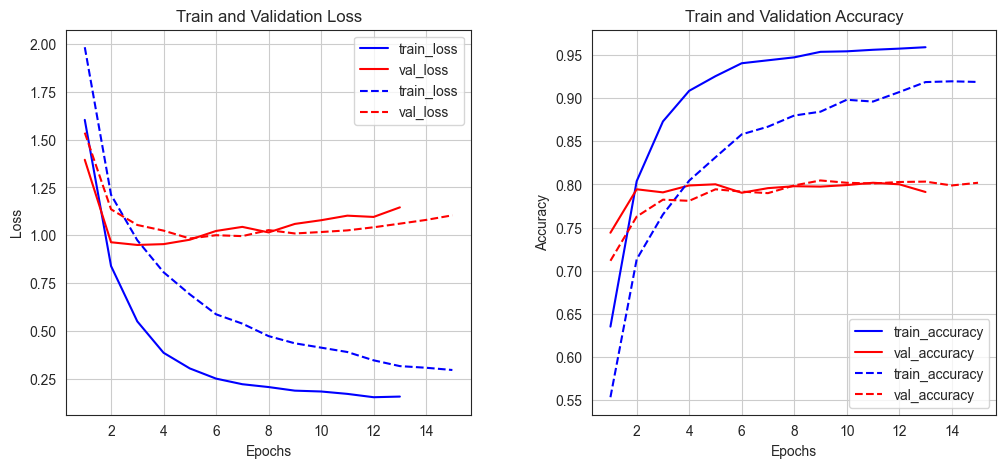

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step - accuracy: 0.7942 - loss: 0.9515
[0.9722512364387512, 0.7876224517822266]


In [25]:
# 시각화
diff_history(history, history2)

# 모델 평가
print(model.evaluate(x_test, y_test))

In [26]:
## dropout 제외
# 모델 정의
model = models.Sequential()
model.add(layers.Dense(128, input_shape=(10000, ), name='input'))
model.add(layers.BatchNormalization()) 
model.add(layers.Activation('relu'))
# model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, name='hidden'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
# model.add(layers.Dropout(0.5))
model.add(layers.Dense(46, activation='softmax', name='output'))

# 모델 컴파일
model.compile(loss='categorical_crossentropy',
             optimizer='Adam',
             metrics=['accuracy'])

# 모델 학습
history3 = model.fit(x_train, y_train, epochs=60,
                   validation_data=(x_val, y_val),
                   callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6026 - loss: 1.8176 - val_accuracy: 0.7752 - val_loss: 1.2318
Epoch 2/60
209/211 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9104 - loss: 0.4338

211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9104 - loss: 0.4335 - val_accuracy: 0.8014 - val_loss: 0.8858
Epoch 3/60
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9564 - loss: 0.1931 - val_accuracy: 0.8019 - val_loss: 0.9364
Epoch 4/60
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9639 - loss: 0.1441 - val_accuracy: 0.8019 - val_loss: 0.9365
Epoch 5/60
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9624 - loss: 0.1255 - val_accuracy: 0.8014 - val_loss: 0.9857
Epoch 6/60
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9641 - loss: 0.1151 - val_accuracy: 0.7983 - val_loss: 1.0192
Epoch 7/60
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9649 - loss: 0.1009 - val_accuracy: 0.8001 - val_loss: 1.0284
Epoch 8/60
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9681 - loss: 0.0891 - val_accuracy: 0.7996 - val_loss: 1.0399
Epoch 9/60
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9676 - loss: 0.0856 - val_accuracy: 0.8001 - val_

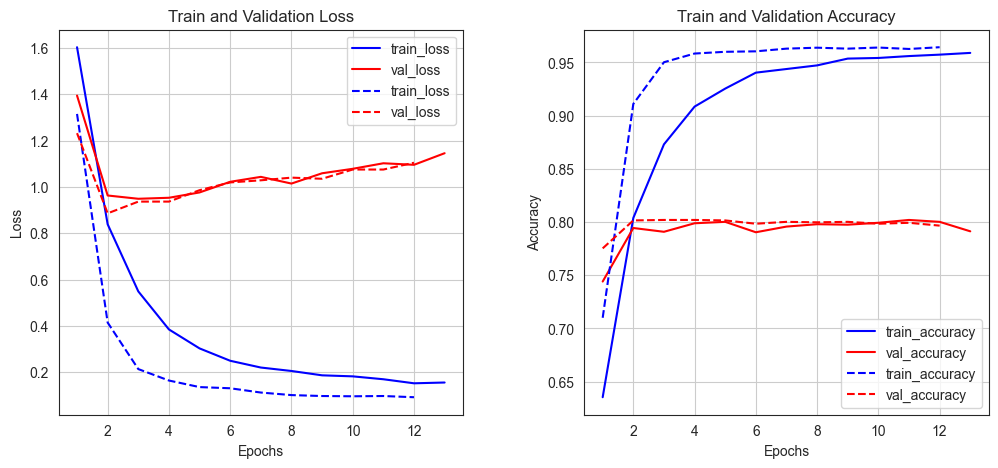

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step - accuracy: 0.7994 - loss: 0.8922
[0.9149196147918701, 0.7902938723564148]


In [27]:
# 시각화
diff_history(history, history3)

# 모델 평가
print(model.evaluate(x_test, y_test))

| history | 모델 최적화 | loss | accuracy | 비고 | 
|---------|----------|-------|---------|-----|
| history | dropout_0.3 | 0.9603 | 0.7921 | - |
| history2 | dropout_0.5 | 0.9865 | 0.8023 | - |
| history3 | dropout_x | 0.9068 | 0.7947 | - |

# 12-4. CIFAR10 딥러닝 모델
- 32x32 픽셀의 6,000개 컬러 이미지
- 각 이미지는 10개의 클래스로 라벨링

## 데이터 로드 및 전처리
- 32 * 32 * 3 크기의 이미지를 3072 크기로 변형(reshape)
- 0 ~ 255 사이의 값을 가지는 이미지를 0 ~ 1 사이의 값으로 변환

In [28]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [29]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                 test_size=0.2,  
                                                 random_state=123)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [30]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

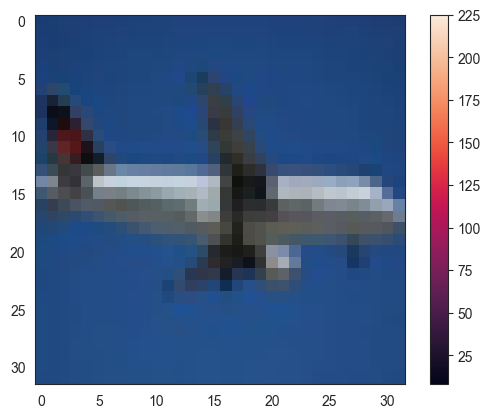

In [31]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
sns.set_style('white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [32]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [33]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
x_train = x_train.reshape(-1, 32 * 32 * 3) 
x_val = x_val.reshape(-1, 32 * 32 * 3)     
x_test = x_test.reshape(-1, 32 * 32 * 3)   

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [34]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

## 모델 구성 및 컴파일
- BatchNormalization과 Dropout을 적용하여 빠르게 학습하면서 과대적합을 방지
- 10개의 이미지를 분류하는 딥러닝 모델을 구성

In [35]:
# 모델 정의
model = models.Sequential()
model.add(layers.Input(shape=(3072, )))
model.add(layers.Dense(2048))
model.add(layers.BatchNormalization()) 
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1024))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

# 모델 컴파일
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='Adam',
             metrics=['accuracy'])

In [36]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 2048)           │     6,293,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 2048)           │         8,192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,935,946 (34.09 MB)

 Trainable params: 8,928,778 (34.06 MB)

 Non-trainable params: 7,168 (28.00 KB)

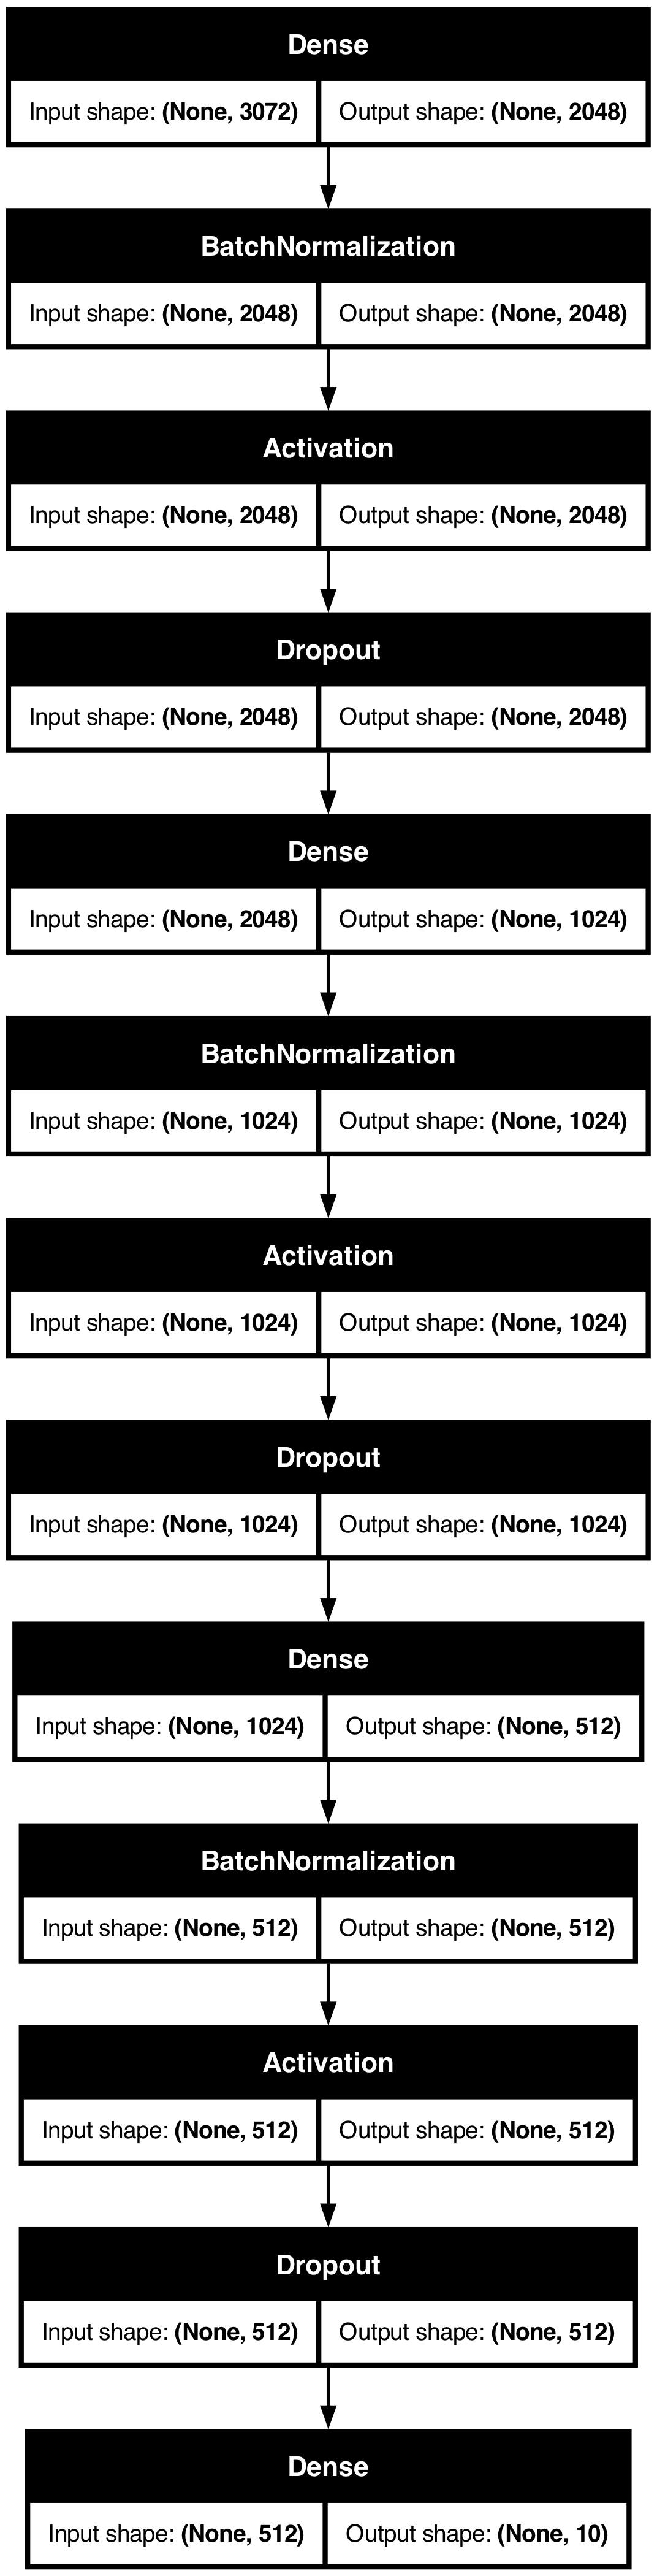

In [37]:
from tensorflow.keras.utils import plot_model
utils.plot_model(model, show_shapes=True)

## 모델 학습

In [38]:
# # 커널이 계속 죽어서 레이어 단순화하기
# # 모델 정의
# model = models.Sequential()
# model.add(layers.Input(shape=(3072, )))
# # model.add(layers.Dense(2048))
# # model.add(layers.BatchNormalization()) 
# # model.add(layers.Activation('relu'))
# # model.add(layers.Dropout(0.5))
# # model.add(layers.Dense(1024))
# # model.add(layers.BatchNormalization())
# # model.add(layers.Activation('relu'))
# # model.add(layers.Dropout(0.5))
# model.add(layers.Dense(512))
# model.add(layers.BatchNormalization())
# model.add(layers.Activation('relu'))
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(10, activation='softmax'))

# # 모델 컴파일
# model.compile(loss='sparse_categorical_crossentropy',
#              optimizer='Adam',
#              metrics=['accuracy'])

In [39]:
check_point_cb = callbacks.ModelCheckpoint('cifar10_model.h5',
                                          save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10,
                                           monitor='val_loss',
                                           restore_best_weights=True)

history = model.fit(x_train, y_train,
                   epochs=60,
                   batch_size=512,
                   validation_data=(x_val, y_val),
                   callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
78/79 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.2478 - loss: 2.2954

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accuracy: 0.2487 - loss: 2.2907 - val_accuracy: 0.2560 - val_loss: 2.6593
Epoch 2/60
78/79 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.3676 - loss: 1.7993

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - accuracy: 0.3678 - loss: 1.7981 - val_accuracy: 0.3478 - val_loss: 1.8185
Epoch 3/60
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - accuracy: 0.4166 - loss: 1.6351 - val_accuracy: 0.3230 - val_loss: 1.8624
Epoch 4/60
78/79 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.4501 - loss: 1.5434

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step - accuracy: 0.4501 - loss: 1.5432 - val_accuracy: 0.3676 - val_loss: 1.7760
Epoch 5/60
78/79 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.4680 - loss: 1.4880

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - accuracy: 0.4681 - loss: 1.4876 - val_accuracy: 0.3924 - val_loss: 1.6848
Epoch 6/60
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step - accuracy: 0.4891 - loss: 1.4265 - val_accuracy: 0.3071 - val_loss: 1.9065
Epoch 7/60
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step - accuracy: 0.5041 - loss: 1.3797 - val_accuracy: 0.3582 - val_loss: 1.7696
Epoch 8/60
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - accuracy: 0.5140 - loss: 1.3568 - val_accuracy: 0.3612 - val_loss: 1.8136
Epoch 9/60
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - accuracy: 0.5296 - loss: 1.3188 - val_accuracy: 0.3654 - val_loss: 1.7727
Epoch 10/60
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - accuracy: 0.5360 - loss: 1.2930 - val_accuracy: 0.3549 - val_loss: 1.7687
Epoch 11/60
78/79 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.5437 - loss: 1.2697

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step - accuracy: 0.5436 - loss: 1.2698 - val_accuracy: 0.4215 - val_loss: 1.6441
Epoch 12/60
78/79 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.5518 - loss: 1.2479

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step - accuracy: 0.5518 - loss: 1.2479 - val_accuracy: 0.4665 - val_loss: 1.5284
Epoch 13/60
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step - accuracy: 0.5682 - loss: 1.2137 - val_accuracy: 0.4138 - val_loss: 1.6158
Epoch 14/60
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - accuracy: 0.5732 - loss: 1.1898 - val_accuracy: 0.4356 - val_loss: 1.6097
Epoch 15/60
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - accuracy: 0.5769 - loss: 1.1798 - val_accuracy: 0.3988 - val_loss: 1.7169
Epoch 16/60
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step - accuracy: 0.5845 - loss: 1.1669 - val_accuracy: 0.3887 - val_loss: 1.6993
Epoch 17/60
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - accuracy: 0.5915 - loss: 1.1410 - val_accuracy: 0.4181 - val_loss: 1.6805
Epoch 18/60
78/79 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.5942 - loss: 1.1173

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - accuracy: 0.5942 - loss: 1.1175 - val_accuracy: 0.4700 - val_loss: 1.4965
Epoch 19/60
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step - accuracy: 0.6070 - loss: 1.0946 - val_accuracy: 0.4560 - val_loss: 1.5398
Epoch 20/60
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step - accuracy: 0.6153 - loss: 1.0770 - val_accuracy: 0.4359 - val_loss: 1.6424
Epoch 21/60
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - accuracy: 0.6182 - loss: 1.0595 - val_accuracy: 0.4385 - val_loss: 1.5851
Epoch 22/60
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - accuracy: 0.6247 - loss: 1.0426 - val_accuracy: 0.4397 - val_loss: 1.5643
Epoch 23/60
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - accuracy: 0.6352 - loss: 1.0180 - val_accuracy: 0.3973 - val_loss: 1.7546
Epoch 24/60
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 82ms/step - accuracy: 0.6348 - loss: 1.0163 - val_accuracy: 0.4186 - val_loss: 1.7516
Epoch 25/60
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - accuracy: 0.6464 - loss: 0.9842 - val_accuracy: 0.4048 - val_l

79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step - accuracy: 0.6532 - loss: 0.9685 - val_accuracy: 0.4780 - val_loss: 1.4935
Epoch 28/60
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step - accuracy: 0.6632 - loss: 0.9424 - val_accuracy: 0.4666 - val_loss: 1.5748
Epoch 29/60
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - accuracy: 0.6710 - loss: 0.9218 - val_accuracy: 0.3930 - val_loss: 1.9578
Epoch 30/60
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - accuracy: 0.6767 - loss: 0.9103 - val_accuracy: 0.4634 - val_loss: 1.5175
Epoch 31/60
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - accuracy: 0.6858 - loss: 0.8766 - val_accuracy: 0.4516 - val_loss: 1.5790
Epoch 32/60
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - accuracy: 0.6873 - loss: 0.8680 - val_accuracy: 0.4708 - val_loss: 1.5551
Epoch 33/60
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - accuracy: 0.6862 - loss: 0.8640 - val_accuracy: 0.4803 - val_loss: 1.5885
Epoch 34/60
78/79 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.7008 - loss: 0.8427

79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step - accuracy: 0.7006 - loss: 0.8431 - val_accuracy: 0.4903 - val_loss: 1.4545
Epoch 35/60
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - accuracy: 0.7085 - loss: 0.8188 - val_accuracy: 0.4045 - val_loss: 1.8246
Epoch 36/60
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - accuracy: 0.7102 - loss: 0.8030 - val_accuracy: 0.3917 - val_loss: 2.0566
Epoch 37/60
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - accuracy: 0.7103 - loss: 0.8008 - val_accuracy: 0.4307 - val_loss: 1.6324
Epoch 38/60
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - accuracy: 0.7137 - loss: 0.7982 - val_accuracy: 0.4559 - val_loss: 1.6922
Epoch 39/60
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - accuracy: 0.7153 - loss: 0.7814 - val_accuracy: 0.4885 - val_loss: 1.5566
Epoch 40/60
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - accuracy: 0.7305 - loss: 0.7515 - val_accuracy: 0.4592 - val_loss: 1.6331
Epoch 41/60
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step - accuracy: 0.7388 - loss: 0.7366 - val_accuracy: 0.4789 - val_l

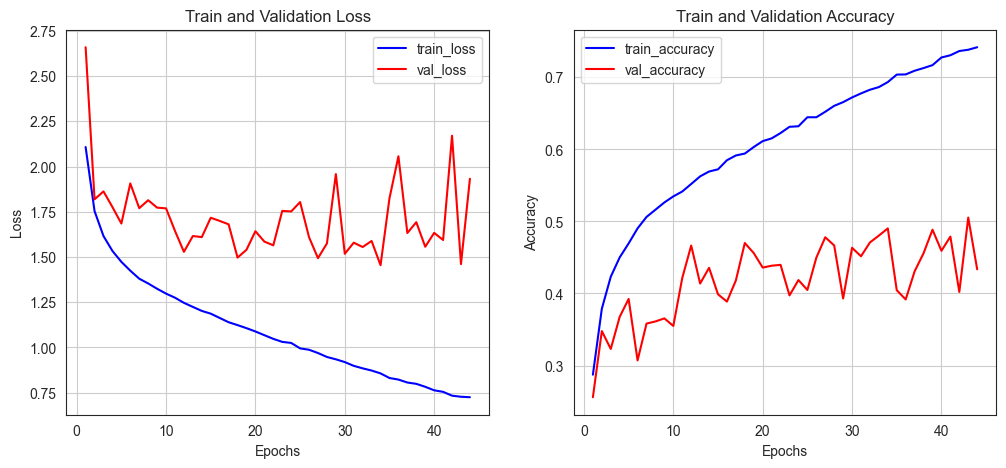

In [40]:
# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
# plt.style.use('seaborn-white')
sns.set_style('white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [41]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4848 - loss: 1.4493


[1.463148593902588, 0.4837000072002411]